In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [3]:
df = pd.read_csv("fraud_transactions.csv")
df.head()

,Transaction_ID,Customer_ID,Transaction_Amount,Transaction_Type,Transaction_Date,Location,Fraudulent
0,T001,C101,5445.0,Online,1/18/2026,Miami,No
1,T002,C102,7698.0,Online,2/24/2026,Dallas,No
2,T003,C103,18449.0,Offline,2/18/2026,Chicago,No
3,T004,C104,16917.0,Online,1/9/2026,Los Angeles,No
4,T005,C105,13656.0,Online,1/23/2026,New York,No


In [4]:
df.shape

(110, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_ID      100 non-null    object 
 1   Customer_ID         100 non-null    object 
 2   Transaction_Amount  100 non-null    float64
 3   Transaction_Type    100 non-null    object 
 4   Transaction_Date    100 non-null    object 
 5   Location            100 non-null    object 
 6   Fraudulent          100 non-null    object 
dtypes: float64(1), object(6)
memory usage: 6.1+ KB


In [6]:
df.isnull().sum()

,0
Transaction_ID,10
Customer_ID,10
Transaction_Amount,10
Transaction_Type,10
Transaction_Date,10
Location,10
Fraudulent,10


In [7]:
df = df.dropna(subset=['Transaction_ID', 'Customer_ID'])

In [8]:
df['Transaction_Amount'] = df['Transaction_Amount'].fillna(
    df['Transaction_Amount'].mean()
)

In [9]:
df['Transaction_Type'] = df['Transaction_Type'].fillna(
    df['Transaction_Type'].mode()[0]
)

In [10]:
df = df.dropna(subset=['Transaction_Date'])

In [11]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

In [12]:
df['Location'] = df['Location'].fillna("Unknown")

In [25]:
df['Fraudulent'] = df['Fraudulent'].fillna('No')

In [14]:
df.isnull().sum()

,0
Transaction_ID,0
Customer_ID,0
Transaction_Amount,0
Transaction_Type,0
Transaction_Date,0
Location,0
Fraudulent,0


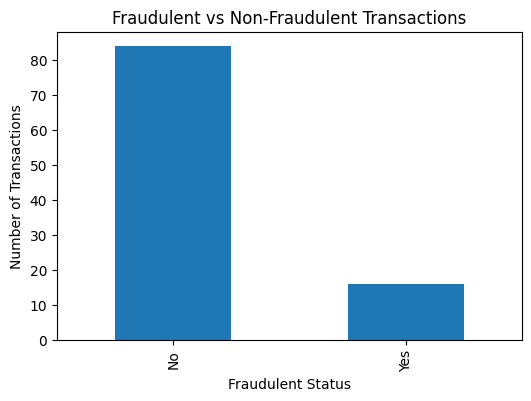

In [26]:
plt.figure(figsize=(6,4))
df['Fraudulent'].value_counts().plot(kind='bar')
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Fraudulent Status')
plt.ylabel('Number of Transactions')
plt.show()

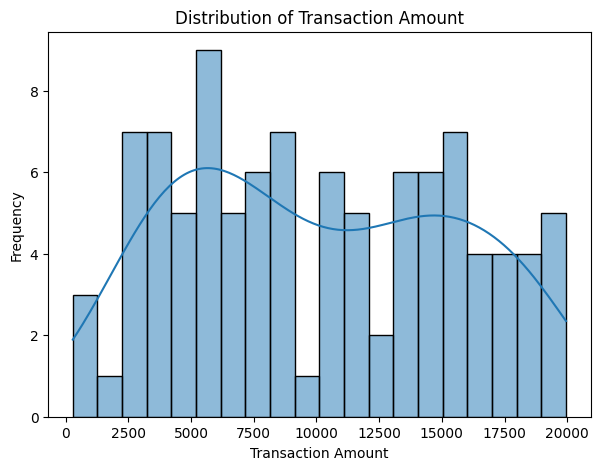

In [16]:
plt.figure(figsize=(7,5))
sns.histplot(df['Transaction_Amount'], bins=20, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

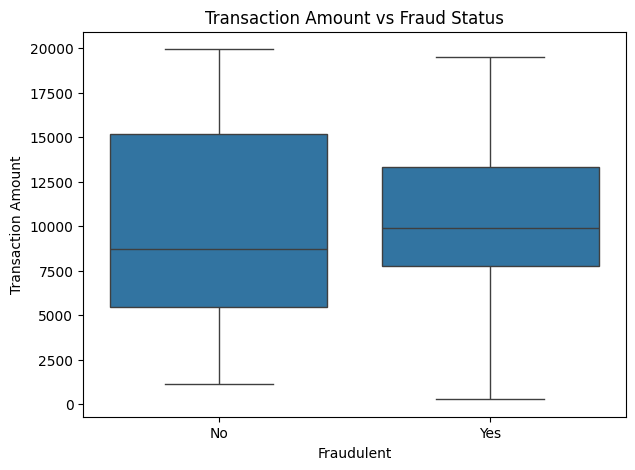

In [17]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Fraudulent', y='Transaction_Amount', data=df)
plt.title('Transaction Amount vs Fraud Status')
plt.xlabel('Fraudulent')
plt.ylabel('Transaction Amount')
plt.show()

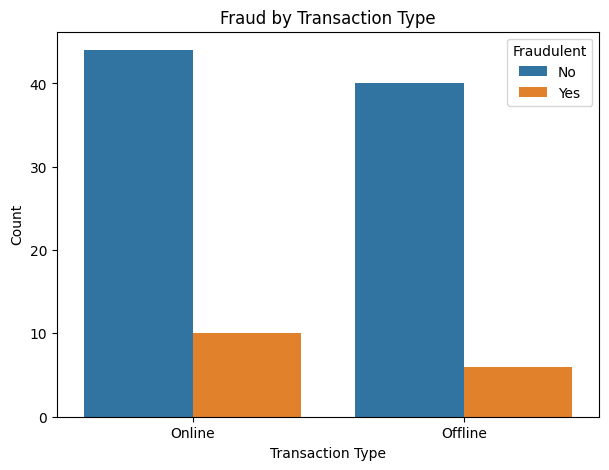

In [18]:
plt.figure(figsize=(7,5))
sns.countplot(x='Transaction_Type', hue='Fraudulent', data=df)
plt.title('Fraud by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

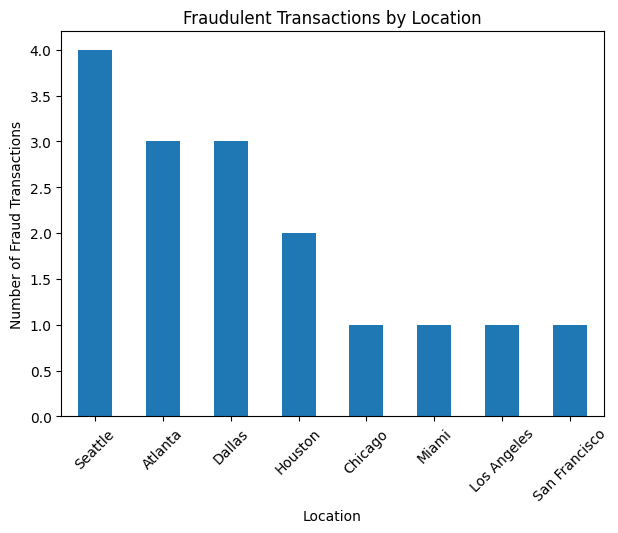

In [22]:
fraud_location = df[df['Fraudulent'] == 'Yes']['Location'].value_counts()

plt.figure(figsize=(7,5))
fraud_location.plot(kind='bar')
plt.title('Fraudulent Transactions by Location')
plt.xlabel('Location')
plt.ylabel('Number of Fraud Transactions')
plt.xticks(rotation=45)
plt.show()

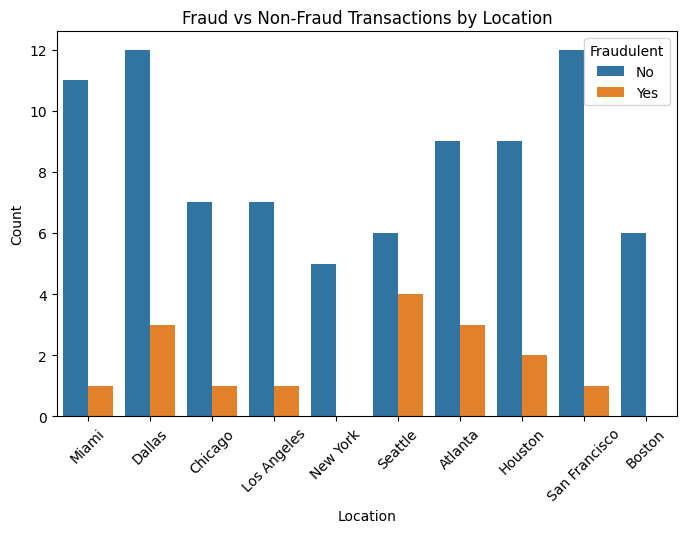

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x='Location', hue='Fraudulent', data=df)
plt.title('Fraud vs Non-Fraud Transactions by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

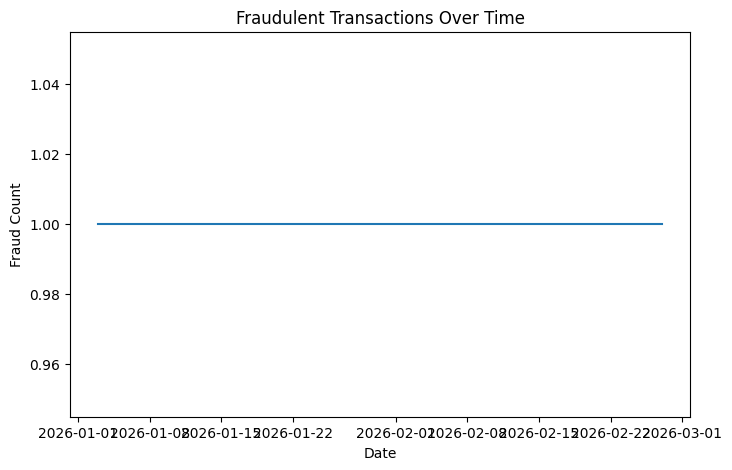

In [24]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

fraud_trend = df[df['Fraudulent'] == 'Yes'] \
                .groupby(df['Transaction_Date'].dt.date) \
                .size()

plt.figure(figsize=(8,5))
fraud_trend.plot()
plt.title('Fraudulent Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Fraud Count')
plt.show()